# Cutting pattern Niihama +
for Fujii-Echelle

Balmer series:

|line     | $\lambda$, nm|
|--       |            --|
|H $\alpha$ |656.279       |
|H $\beta$  |486.135       |

I don't have time to make this fully automated. The configuration of a particular spectrometer 
determines the shape of diffraction orders. So we can just copy approximate equations 
for each order line. (Same excuse as Niihama has)

## Imports and Setup

In [1]:
%matplotlib inline

In [2]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import peakutils
import pandas as pd
from PIL import Image
from aklab.mpls import font_setup
from lmfit.models import GaussianModel
from scipy.signal import savgol_filter

In [3]:
from PIL import Image

In [4]:
bpth = './data'
fname = 'Sep28_2022_175416_100ms_sekibunki.tif'
tifim = Image.open(os.path.join(bpth,fname))
print(f'N(frames) = {tifim.n_frames}')
# Transpose to get the lines closer to horizontal
image = np.array(tifim).T
# Crop image
# crop = [1400,2600] # Crop used by Niihama
crop = [1300,2950]
image = image[crop[0]:crop[1]]

#sekibun = image[1400:2600].T
sekibun = image.T
sekibun = sekibun - sekibun.min()
# y pixel - chane in order
# x pixel - change in wavelength
nx,ny = sekibun.shape

N(frames) = 1


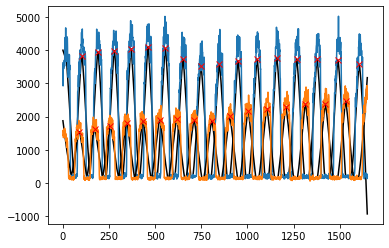

In [5]:
# profile along pixel x = i
xsection = [0,nx-1]
THRESHOLD = 0.06
MIN_DISTANCE = 60 

peaksy = []
clr = ['C0','C1']
for j,xi in enumerate(xsection):
    d = savgol_filter(sekibun[xi],41,1)
    peaks = peakutils.indexes(d,thres=THRESHOLD,min_dist=MIN_DISTANCE)
    py = np.arange(ny)[peaks]
    peaksy.append(py)
    plt.plot(d,'k')
    plt.plot(sekibun[xi],c=clr[j])
    plt.plot(py,d[peaks],'xr')

# Only works if on each line same number of peaks is detected
# Numpy doesn't like uneven arrays
peaksy = np.array(peaksy)

In [6]:
half_width = 15
line_k = 250/nx

(-100.0, 2404.0)

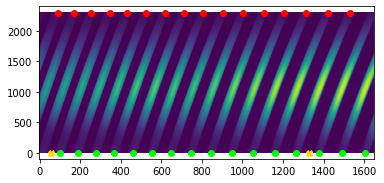

In [7]:
plt.imshow(sekibun,aspect = 0.3,origin='lower')
clr = ['lime','r']
offset = [peaksy[0,0]-half_width*3,peaksy[-1,-1]-line_k*nx + half_width*3]
for j,xi in enumerate(xsection):
    plt.plot(peaksy[j],np.ones(len(peaksy[j]))*xi,'o',c=clr[j])
    plt.plot(offset[j],0,'X',c='gold')
plt.ylim([-100,nx+100])

Text(0.5, 0, 'x (wavelength)')

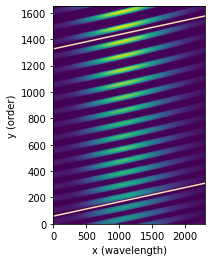

In [8]:
plt.imshow(image,aspect = 2,origin='lower')
x = np.arange(nx)
#[plt.plot(y*line_k+o,y,'wheat') for o in offset]
[plt.plot(x,x*line_k+o,'wheat') for o in offset]

plt.ylabel('y (order)')
plt.xlabel('x (wavelength)')

In [9]:
for x in np.arange(nx):
    y0 = int(x* line_k + offset[0])
    y1 = int(x*line_k +offset[-1])

    image[y1:,x] = image.min()
    image[:y0,x] = image.min()
    #print(y0,y1)    

Text(0.5, 0, 'x (wavelength)')

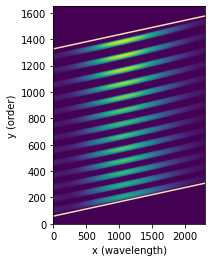

In [10]:
plt.imshow(image,aspect = 2,origin='lower')
x = np.arange(nx)
#[plt.plot(y*line_k+o,y,'wheat') for o in offset]
[plt.plot(x,x*line_k+o,'wheat') for o in offset]

plt.ylabel('y (order)')
plt.xlabel('x (wavelength)')

# Get peaks to fit order shapes
Since we removed partial orders, we can get a uniform matrix with peak positions

In [11]:
step = 200
xsection = np.arange(0,nx,step)
THRESHOLD = 0.06
MIN_DISTANCE = 60 

peaksy = []
clr = ['C0','C1']
for j,xi in enumerate(xsection):
    d = savgol_filter(image[:,xi],41,1)
    peaks = peakutils.indexes(d,thres=THRESHOLD,min_dist=MIN_DISTANCE)
    py = np.arange(ny)[peaks]
    peaksy.append(py)
peaksy = np.array(peaksy)

In [12]:
peaksy.shape

(12, 13)

In [13]:
fits = []
_ = [fits.append(np.poly1d(np.polyfit(xsection,l,2))) for l in peaksy.T]
x = np.arange(nx)
pattern = np.array([f(x) for f in fits])

Text(0.5, 0, 'x (wavelength)')

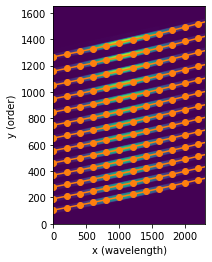

In [14]:
plt.imshow(image,aspect = 2,origin='lower')
_ = [plt.plot(xsection,y,'C1o') for y in peaksy.T]

[plt.plot(x,f(x),'C1') for f in fits]

plt.ylabel('y (order)')
plt.xlabel('x (wavelength)')

In [15]:
np.savetxt('pattern_fujii.txt', pattern.T, fmt='%.d')

# Load image with echelle_spectra

<Figure size 432x288 with 0 Axes>

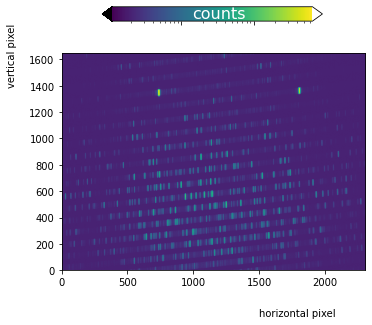

In [16]:
%run ../tools/echelle.py
folder = './data'
#crop = [1200,2900]
fname = 'Sep28_2022_173557_1s_H2.tif'
im = EchelleImage(os.path.join(bpth,fname),spec='fujii',crop=crop)
im.plot_frame(0)

In [17]:
crop

[1300, 2950]

<Figure size 432x288 with 0 Axes>

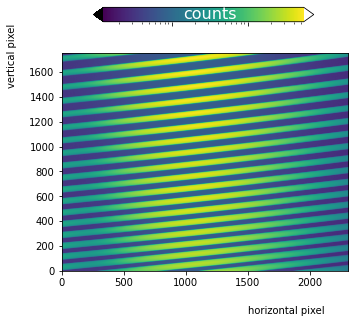

In [18]:
%run ../tools/echelle.py
folder = './data'
crop = [1200,2950]
fname = 'Sep28_2022_175416_100ms_sekibunki.tif'
im = EchelleImage(os.path.join(bpth,fname),spec='fujii',crop=crop)
im.plot_frame(0)